#### Importando Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import multilabel_confusion_matrix 
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier as DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import pickle

##### Lendo e separando as features do Dataset

In [2]:
waits = pd.read_csv("amostra_V3_classificado.csv", sep=';')


features = ['PAGEIOLATCH_EX', 'PAGEIOLATCH_UP', 'PAGEIOLATCH_SH',
       'SOS_SCHEDULER_YIELD', 'RESOURCE_SEMAPHORE', 'CMEMTHREAD',
       'IO_COMPLETION', 'ASYNC_IO_COMPLETION', 'WRITELOG', 'ASYNC_NETWORK_IO', 'DBMIRROR_SEND']
targets = ['problema_CPU', 'problema_Memoria', 'problema_Disco', 'problema_Rede']

X_var = waits[features].values
y_var = waits[targets].values

waits.head()

,PAGEIOLATCH_EX,PAGEIOLATCH_UP,PAGEIOLATCH_SH,SOS_SCHEDULER_YIELD,RESOURCE_SEMAPHORE,CMEMTHREAD,IO_COMPLETION,ASYNC_IO_COMPLETION,WRITELOG,ASYNC_NETWORK_IO,DBMIRROR_SEND,problema_CPU,problema_Memoria,problema_Disco,problema_Rede
0,0.639605,9.287783,4.545155,5.844105,36.748877,0.195975,1.771376,10.909048,28.745828,1.312248,0.000000,0,0,0,0
1,0.000000,4.157652,40.703838,12.885621,7.215357,0.045944,0.000000,19.960696,3.533276,11.398432,0.099183,0,0,1,0
2,0.000000,0.516987,21.916913,0.422149,6.080850,0.000016,0.000000,0.472562,3.319718,67.176791,0.094014,0,0,0,1
3,0.000000,56.300788,0.430845,0.011836,5.655800,0.095685,0.000000,2.756098,1.922692,32.769945,0.056312,0,0,1,0
4,0.000000,12.735603,38.128408,0.720209,3.147025,0.002884,0.010790,42.895712,1.156864,0.880539,0.321965,0,0,1,0


#### Informações sobre o Dataset

In [3]:
waits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PAGEIOLATCH_EX       168 non-null    float64
 1   PAGEIOLATCH_UP       168 non-null    float64
 2   PAGEIOLATCH_SH       168 non-null    float64
 3   SOS_SCHEDULER_YIELD  168 non-null    float64
 4   RESOURCE_SEMAPHORE   168 non-null    float64
 5   CMEMTHREAD           168 non-null    float64
 6   IO_COMPLETION        168 non-null    float64
 7   ASYNC_IO_COMPLETION  168 non-null    float64
 8   WRITELOG             168 non-null    float64
 9   ASYNC_NETWORK_IO     168 non-null    float64
 10  DBMIRROR_SEND        168 non-null    float64
 11  problema_CPU         168 non-null    int64  
 12  problema_Memoria     168 non-null    int64  
 13  problema_Disco       168 non-null    int64  
 14  problema_Rede        168 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 1

#### Divisão dos conjuntos de Teste e Treinamento

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 33)

#### Criando o modelo Decision Tree (Scikit-learn)

In [85]:
model = DecisionTreeClassifier(criterion = 'gini')
model.fit(X_train, y_train)

pred_model = model.predict(X_test)

print('Acurácia: {:.0%}'.format(accuracy_score(y_test, pred_model)))

Acurácia: 91%


#### Plotando a Matriz de Confusão

In [6]:
y_true = y_test
y_pred  = pred_model

cm = multilabel_confusion_matrix(y_true, y_pred)
print(cm)

[[[31  0]
  [ 0  2]]

 [[33  0]
  [ 0  0]]

 [[ 7  3]
  [ 5 18]]

 [[28  0]
  [ 0  5]]]


#### Plotando a Decision Tree

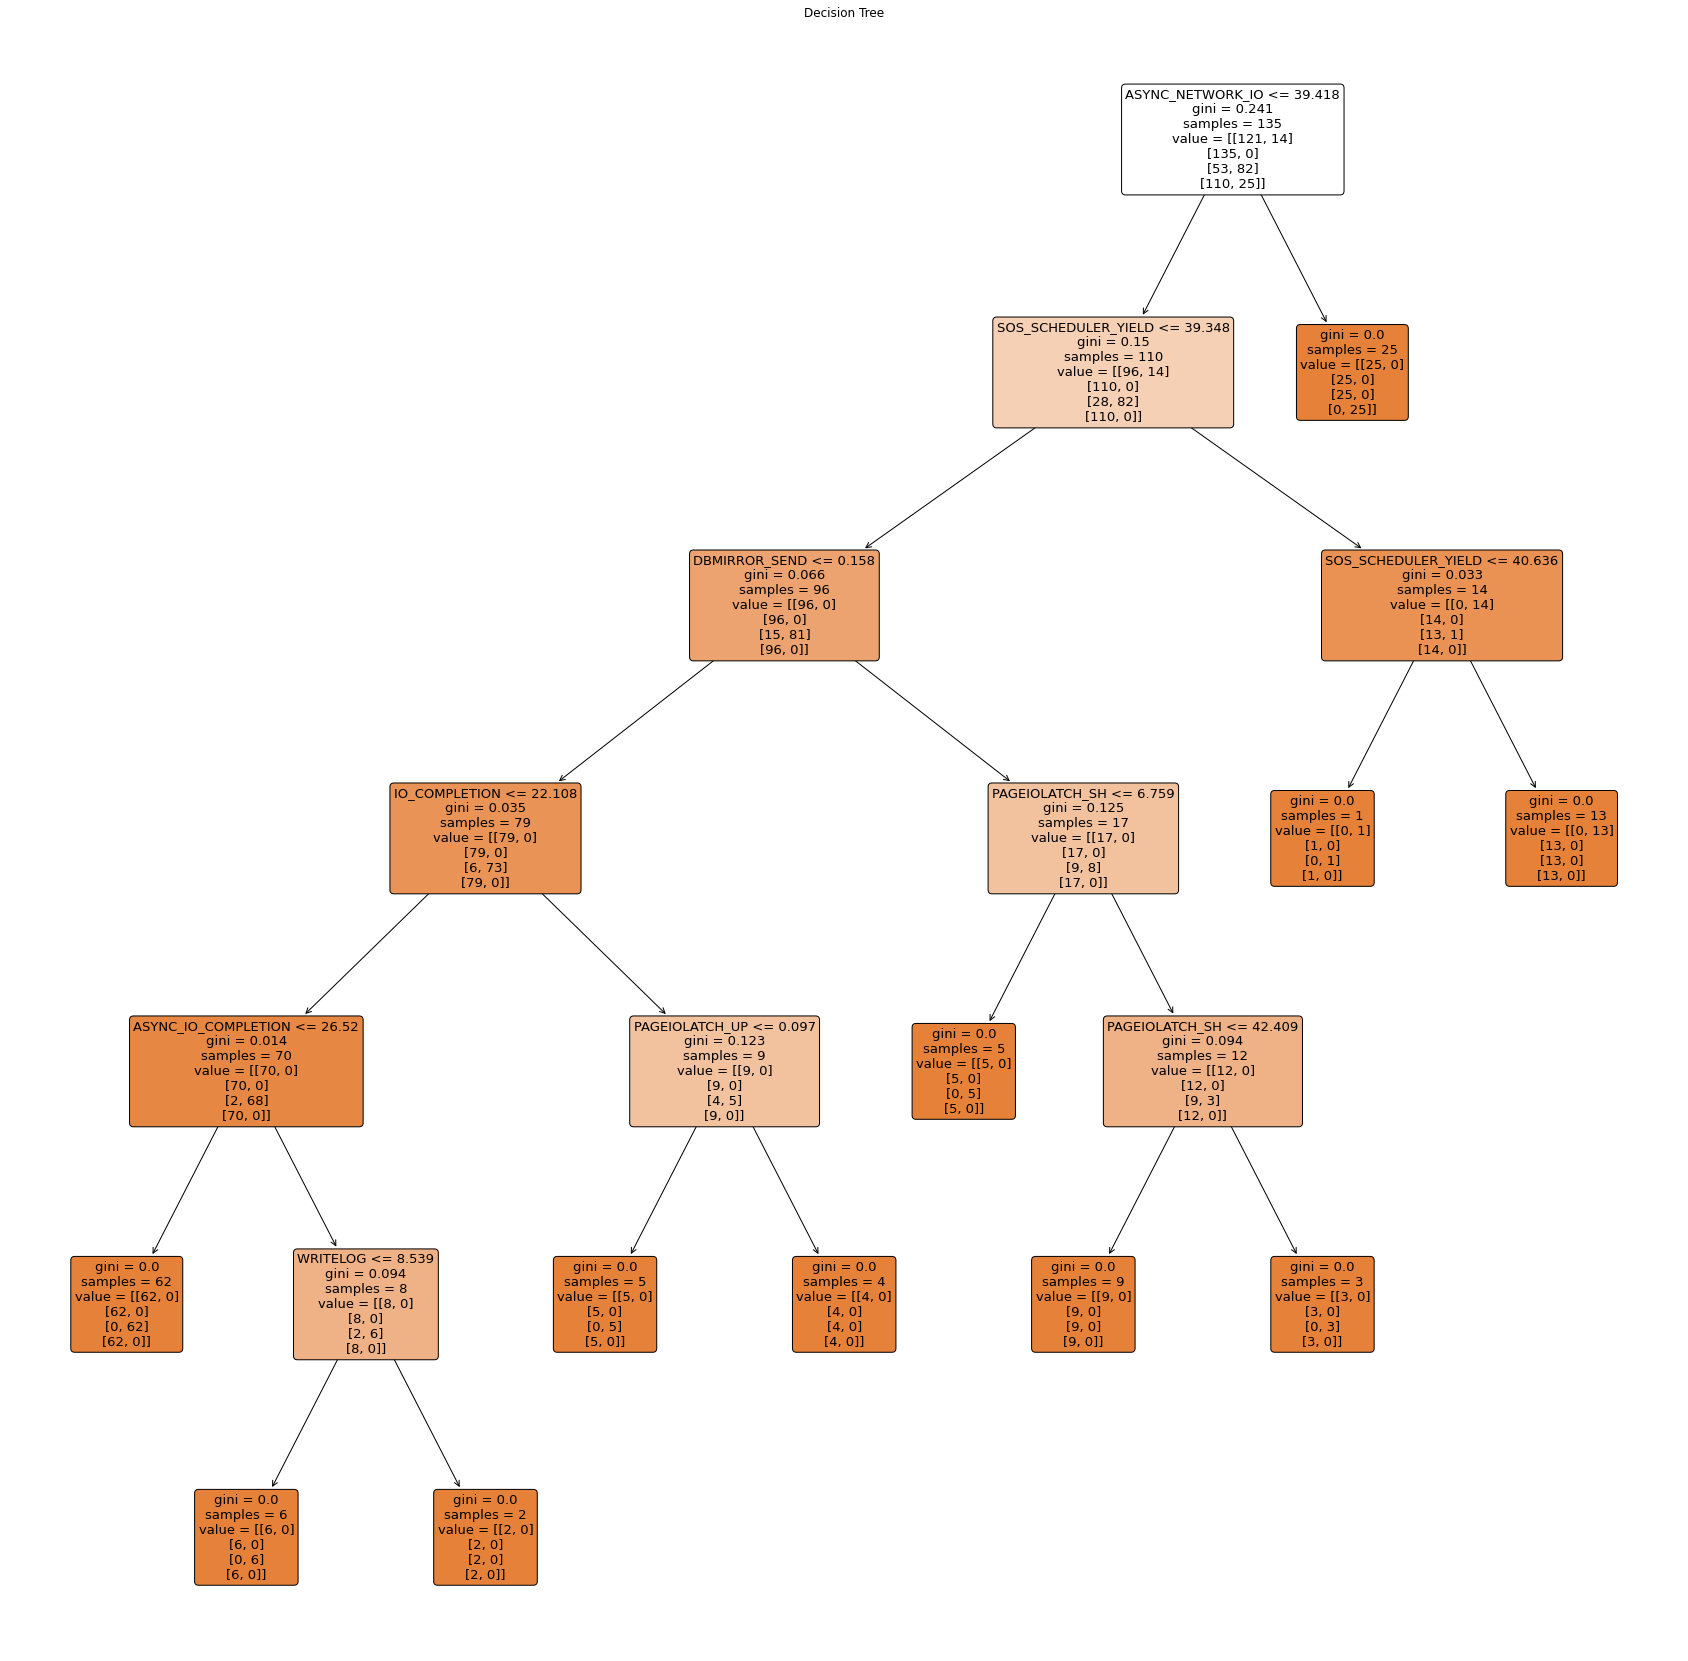

In [7]:
_, ax = plt.subplots(figsize=(30,30))

plot_tree(model, 
        feature_names = features, 
        class_names = targets, 
        filled = True, 
        rounded = True,
        ax=ax         
        )
          
plt.title("Decision Tree")
plt.savefig('DecisionTree__V3.png')

#### Exportando o modelo treinado (.pkl)

In [8]:
decision_tree_pkl_filename = 'DecisionTree__V3.pkl'

decision_tree_model_pkl = open(decision_tree_pkl_filename, 'wb')

pickle.dump(model, decision_tree_model_pkl)

decision_tree_model_pkl.close()